In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Time': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48],
    'Grid ID': [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6],
    'Crop': ['Apple','Rice','Maize','Tomato','Potato','Cotton','Apple','Rice','Maize','Tomato','Potato','Cotton','Apple','Rice','Maize','Tomato','Potato','Cotton','Apple','Rice','Maize','Tomato','Potato','Cotton','Apple','Rice','Maize','Tomato','Potato','Cotton','Apple','Rice','Maize','Tomato','Potato','Cotton','Apple','Rice','Maize','Tomato','Potato','Cotton','Apple','Rice','Maize','Tomato','Potato','Cotton'],
    'Moisture': [42.3,28.5,35.6,38.2,40.1,34.2,41.8,29.1,36.2,37.9,39.8,33.9,43.1,27.9,34.9,38.5,40.4,34.5,42.6,28.7,35.8,37.6,39.5,33.6,41.5,29.3,36.5,38.8,40.7,34.8,42.9,28.3,35.7,38.3,40.2,34.3,41.7,29.2,36.3,37.8,39.9,33.8,43.2,28.8,35.5,38.6,40.5,34.6],
    'N': [0.25,0.32,0.45,0.28,0.22,0.38,0.23,0.33,0.47,0.27,0.21,0.37,0.26,0.31,0.44,0.29,0.23,0.39,0.24,0.32,0.46,0.26,0.20,0.36,0.22,0.34,0.48,0.30,0.24,0.40,0.25,0.31,0.45,0.28,0.22,0.38,0.22,0.33,0.47,0.26,0.21,0.36,0.26,0.32,0.44,0.29,0.23,0.39],
    'P': [0.15,0.22,0.35,0.18,0.16,0.28,0.14,0.23,0.36,0.17,0.15,0.27,0.16,0.21,0.34,0.19,0.17,0.29,0.15,0.22,0.35,0.16,0.14,0.26,0.13,0.24,0.37,0.20,0.18,0.30,0.15,0.21,0.35,0.18,0.16,0.28,0.14,0.23,0.36,0.17,0.15,0.26,0.16,0.22,0.34,0.19,0.17,0.29],
    'K': [0.20,0.28,0.40,0.25,0.19,0.35,0.18,0.30,0.42,0.24,0.18,0.34,0.22,0.27,0.39,0.26,0.20,0.36,0.19,0.29,0.41,0.23,0.17,0.33,0.17,0.31,0.43,0.27,0.21,0.37,0.21,0.27,0.40,0.25,0.19,0.35,0.18,0.30,0.42,0.24,0.18,0.33,0.22,0.29,0.39,0.26,0.20,0.36],
    'pH': [6.2,5.8,6.5,6.7,5.5,6.9,6.3,5.9,6.4,6.8,5.6,7.0,6.1,5.7,6.6,6.6,5.4,6.8,6.4,5.8,6.3,6.9,5.7,7.1,6.2,6.0,6.5,6.7,5.5,6.9,6.3,5.9,6.4,6.8,5.6,7.0,6.2,5.8,6.5,6.7,5.5,6.9,6.4,5.7,6.6,6.9,5.4,6.8]
}

df = pd.DataFrame(data)

le = LabelEncoder()
df['Crop_Encoded'] = le.fit_transform(df['Crop'])

features = ['Moisture', 'N', 'P', 'K', 'pH']
X = df[features]
y = df['Crop_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

unique_labels = np.unique(y_test)

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled, y_train, 
    validation_split=0.2, 
    epochs=100, 
    batch_size=16, 
    verbose=0
)

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 109ms/step



Crop Suitability Prediction:
1/1 [==============================] - 0s 29ms/step
Tomato: 53.54%
Apple: 34.97%
Potato: 5.96%
Cotton: 3.02%
Rice: 1.91%
Maize: 0.59%


D:\Conda\envs\ml_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


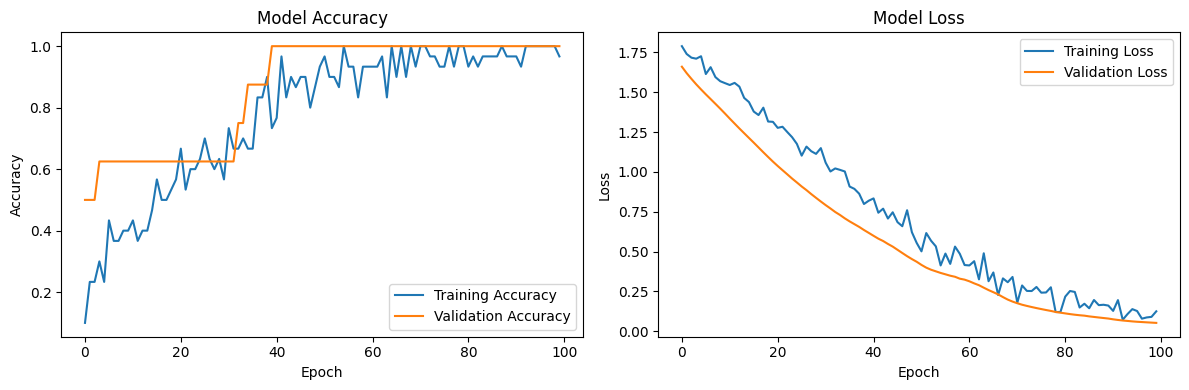

In [3]:
def predict_crop_suitability(moisture, N, P, K, pH):
    # Prepare the input
    input_data = np.array([[moisture, N, P, K, pH]])
    input_scaled = scaler.transform(input_data)
    
    predictions = model.predict(input_scaled)[0]
    
    crop_probs = {}
    for i, crop in enumerate(le.classes_):
        crop_probs[crop] = predictions[i]
    
    sorted_crops = sorted(crop_probs.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_crops

print("\nCrop Suitability Prediction:")
new_grid_conditions = (40, 0.3, 0.2, 0.25, 6.5)
suitability = predict_crop_suitability(*new_grid_conditions)
for crop, probability in suitability:
    print(f"{crop}: {probability*100:.2f}%")

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import gspread
import numpy as np
import time
import warnings
import os
import sys
import io
from google.oauth2.service_account import Credentials

# Suppress warnings and TensorFlow logs
warnings.filterwarnings("ignore", category=UserWarning)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # Suppress TensorFlow messages

# Path to your service account key JSON file
SERVICE_ACCOUNT_FILE = "credentials.json"

# Google Sheet ID
SHEET_ID = "1vhY10HYRuAwI5L-pcSfyxDrtIWGaFql9ILKQM2JPr88"

# Authenticate Google Sheets API
creds = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=["https://www.googleapis.com/auth/spreadsheets"])
client = gspread.authorize(creds)

# Open Google Sheets
sheet2 = client.open_by_key(SHEET_ID).worksheet("Sheet2")
sheet3 = client.open_by_key(SHEET_ID).worksheet("Sheet3")

def update_predictions():
    df_sheet2 = pd.DataFrame(sheet2.get_all_records())
    df_sheet2[["Moisture", "N", "P", "K", "pH"]] = df_sheet2[["Moisture", "N", "P", "K", "pH"]].apply(pd.to_numeric, errors="coerce")
    
    avg_values = df_sheet2.groupby("Grid ID")[["Moisture", "N", "P", "K", "pH"]].mean().reset_index()
    df_sheet3 = pd.DataFrame(sheet3.get_all_records())

    df_sheet3["Suitable Crop"] = df_sheet3["Grid ID"].map(
        lambda gid: predict_crop_suitability(avg_values[avg_values["Grid ID"] == gid].iloc[0, 1:].values)
    )

    sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())
    print("✅ Google Sheets Updated Successfully!")

def predict_crop_suitability(input_data):
    old_stdout = sys.stdout
    sys.stdout = io.StringIO()

    try:
        input_scaled = scaler.transform([input_data])
        predictions = model.predict(input_scaled)[0]
        crop_probs = sorted(zip(le.classes_, predictions), key=lambda x: x[1], reverse=True)
        return crop_probs[0][0]
    finally:
        sys.stdout = old_stdout  # Restore stdout

while True:
    update_predictions()
    for i in range(1,5):
        sheet3.update_cell(2, 11, i)
        time.sleep(5)

C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())


✅ Google Sheets Updated Successfully!


C:\Users\LENOVO T470\AppData\Local\Temp\ipykernel_13464\1062545624.py:40: DeprecationWarning: [Deprecated][in version 6.0.0]: Method signature's arguments 'range_name' and 'values' will change their order. We recommend using named arguments for minimal impact. In addition, the argument 'values' will be mandatory of type: 'List[List]'. (ex) Worksheet.update(values = [[]], range_name=) 
  sheet3.update(range_name="A1", values=[df_sheet3.columns.values.tolist()] + df_sheet3.values.tolist())
